
# Introduction to Pandas

Based on a series of tutorials by Chris Fonnesbeck: 

https://github.com/fonnesbeck/statistical-analysis-python-tutorial

Pandas provides a useful wrapper for tabular data, with lots of utilities for restructuring and analizing data.

http://pandas.pydata.org/pandas-docs/stable/

This book is a great starting point for getting further into Pandas:

[Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do)

pandas is well suited for:

- Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet
- Ordered and unordered (not necessarily fixed-frequency) time series data.
- Arbitrary matrix data (homogeneously typed or heterogeneous) with row and column labels
- Any other form of observational / statistical data sets. The data actually need not be labeled at all to be placed into a pandas data structure


Key features:
    
- Easy handling of **missing data**
- **Size mutability**: columns can be inserted and deleted from DataFrame and higher dimensional objects
- Automatic and explicit **data alignment**: objects can be explicitly aligned to a set of labels, or the data can be aligned automatically
- Powerful, flexible **group by functionality** to perform split-apply-combine operations on data sets
- Intelligent label-based **slicing, fancy indexing, and subsetting** of large data sets
- Intuitive **merging and joining** data sets
- Flexible **reshaping and pivoting** of data sets
- **Hierarchical labeling** of axes
- Robust **IO tools** for loading data from flat files, Excel files, databases, and HDF5
- **Time series functionality**: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging, etc.


Pandas uses the numpy arrays under the hood.  Numpy is a very high-performance multi-dimensional interface to blocks of memory that can be accessed efficiently.  See the introduction to Numpy for background information.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

# Set some Pandas options
pd.set_option('html', False)
pd.set_option('max_columns', 30)
pd.set_option('max_rows', 20)

### Pandas Data Structures

### Series

A **Series** is a single vector of data (like a one-dimensional NumPy array) with an *index* that labels each element in the vector.

In [2]:
counts = pd.Series([632, 1638, 569, 115])
counts

0     632
1    1638
2     569
3     115
dtype: int64

If an index is not specified, a default sequence of integers is assigned as the index. A NumPy array comprises the values of the `Series`, while the index is a pandas `Index` object.

In [3]:
counts.values

array([ 632, 1638,  569,  115], dtype=int64)

In [4]:
counts.index

RangeIndex(start=0, stop=4, step=1)

We can assign meaningful labels to the index, if they are available:

In [5]:
top_grantmakers_2014 = pd.Series([3921403840, 1171857588, 964514537, 964514537], 
    index=['Bill & Melinda Gates Foundation', 'Schwab Charitable Fund', 'Silicon Valley Community Foundation', 'Gordon and Betty Moore Foundation'])
print (top_grantmakers_2014)

Bill & Melinda Gates Foundation        3921403840
Schwab Charitable Fund                 1171857588
Silicon Valley Community Foundation     964514537
Gordon and Betty Moore Foundation       964514537
dtype: int64


These labels can be used to refer to the values in the `Series`, dictionary-style.

In [6]:
top_grantmakers_2014['Silicon Valley Community Foundation']

964514537

Boolean indexing can work as well:

In [7]:
[name.endswith('Fund') for name in top_grantmakers_2014.index]

[False, True, False, False]

In [8]:
top_grantmakers_2014[[name.endswith('Fund') for name in top_grantmakers_2014.index]]

Schwab Charitable Fund    1171857588
dtype: int64

Notice that the indexing operation preserved the association between the values and the corresponding indices.

We can still use positional indexing if we wish.

In [10]:
print(top_grantmakers_2014[1])
print(top_grantmakers_2014.index[1])

1171857588
Schwab Charitable Fund


We can give both the array of values and the index meaningful labels themselves:

In [11]:
top_grantmakers_2014.name = 'Top Amounts'
top_grantmakers_2014.index.name = 'Grantmaker'
top_grantmakers_2014

Grantmaker
Bill & Melinda Gates Foundation        3921403840
Schwab Charitable Fund                 1171857588
Silicon Valley Community Foundation     964514537
Gordon and Betty Moore Foundation       964514537
Name: Top Amounts, dtype: int64

NumPy's math functions and other operations can be applied to Series without losing the data structure.

In [12]:
np.log(top_grantmakers_2014)

Grantmaker
Bill & Melinda Gates Foundation        22.089716
Schwab Charitable Fund                 20.881856
Silicon Valley Community Foundation    20.687135
Gordon and Betty Moore Foundation      20.687135
Name: Top Amounts, dtype: float64

We can also filter according to the values in the `Series`:

In [13]:
top_grantmakers_2014[top_grantmakers_2014>10**9]

Grantmaker
Bill & Melinda Gates Foundation    3921403840
Schwab Charitable Fund             1171857588
Name: Top Amounts, dtype: int64

A `Series` can be thought of as an ordered key-value store. In fact, we can create one from a `dict`:

In [14]:
top_gm_dict = {'Schwab Charitable Fund': 1171857588, 'Bill & Melinda Gates Foundation': 3921403840, 'Gordon and Betty Moore Foundation': 964514537, 'Silicon Valley Community Foundation': 964514537}
print(pd.Series(top_gm_dict))

Bill & Melinda Gates Foundation        3921403840
Gordon and Betty Moore Foundation       964514537
Schwab Charitable Fund                 1171857588
Silicon Valley Community Foundation     964514537
dtype: int64


Notice that the `Series` is created in key-sorted order.

If we pass a custom index to `Series`, it will select the corresponding values from the dict, and treat indices without corrsponding values as missing. Pandas uses the `NaN` (not a number) type for missing values.  Graceful handling of missing and null data is a key feature of Pandas:

In [17]:
top_gm_series = pd.Series(top_gm_dict, index=['Unknown', 'Bill & Melinda Gates Foundation','Schwab Charitable Fund','Silicon Valley Community Foundation','Gordon and Betty Moore Foundation'])
print(top_gm_series)

Unknown                                         NaN
Bill & Melinda Gates Foundation        3.921404e+09
Schwab Charitable Fund                 1.171858e+09
Silicon Valley Community Foundation    9.645145e+08
Gordon and Betty Moore Foundation      9.645145e+08
dtype: float64


In [18]:
top_gm_series.isnull()

Unknown                                 True
Bill & Melinda Gates Foundation        False
Schwab Charitable Fund                 False
Silicon Valley Community Foundation    False
Gordon and Betty Moore Foundation      False
dtype: bool

Critically, the labels are used to **align data** when used in operations with other Series objects:

In [20]:
print(top_gm_series)
print(top_grantmakers_2014)
print(top_gm_series + top_grantmakers_2014)

Unknown                                         NaN
Bill & Melinda Gates Foundation        3.921404e+09
Schwab Charitable Fund                 1.171858e+09
Silicon Valley Community Foundation    9.645145e+08
Gordon and Betty Moore Foundation      9.645145e+08
dtype: float64
Grantmaker
Bill & Melinda Gates Foundation        3921403840
Schwab Charitable Fund                 1171857588
Silicon Valley Community Foundation     964514537
Gordon and Betty Moore Foundation       964514537
Name: Top Amounts, dtype: int64
Bill & Melinda Gates Foundation        7.842808e+09
Gordon and Betty Moore Foundation      1.929029e+09
Schwab Charitable Fund                 2.343715e+09
Silicon Valley Community Foundation    1.929029e+09
Unknown                                         NaN
dtype: float64


Contrast this with NumPy arrays, where arrays of the same length will combine values element-wise; adding Series combined values with the same label in the resulting series. Notice also that the missing values were propogated by addition.

### DataFrame

Inevitably, we want to be able to store, view and manipulate data that is multivariate, where for every index there are multiple fields or columns of data, often of varying data type.

A `DataFrame` is a tabular data structure, encapsulating multiple series like columns in a spreadsheet. Data are stored internally as a 2-dimensional object, but the `DataFrame` allows us to represent and manipulate higher-dimensional data.

In [22]:
df = pd.DataFrame({  'gm_state':['CA', 'CA', 'NY', 'NY', 'NY'],
                     'amount':[569092056, 538673007, 506235384, 467353105, 443120415],
                     'recip_state':['NJ', 'NY', 'MA', 'CA', 'DC']})
print(df)

      amount gm_state recip_state
0  569092056       CA          NJ
1  538673007       CA          NY
2  506235384       NY          MA
3  467353105       NY          CA
4  443120415       NY          DC


Notice the `DataFrame` is sorted by column name. We can change the order by indexing them in the order we desire:

In [23]:
df[['gm_state','recip_state','amount']]

  gm_state recip_state     amount
0       CA          NJ  569092056
1       CA          NY  538673007
2       NY          MA  506235384
3       NY          CA  467353105
4       NY          DC  443120415

A `DataFrame` has a second index, representing the columns:

In [24]:
df.columns

Index(['amount', 'gm_state', 'recip_state'], dtype='object')

If we wish to access columns, we can do so either by dict-like indexing or by attribute:

In [25]:
df['amount']

0    569092056
1    538673007
2    506235384
3    467353105
4    443120415
Name: amount, dtype: int64

In [26]:
df.amount

0    569092056
1    538673007
2    506235384
3    467353105
4    443120415
Name: amount, dtype: int64

Columns act as series

In [29]:
type(df.amount)

pandas.core.series.Series

A dataframes columns can be accessed using an array, in which case the result is a dataframe, even if it only has one column:

In [30]:
type(df[['amount']])

pandas.core.frame.DataFrame

Notice this is different than with `Series`, where dict-like indexing retrieved a particular element (row). If we want access to a row in a `DataFrame`, we index its `ix` attribute.


In [31]:
df.ix[3]

amount         467353105
gm_state              NY
recip_state           CA
Name: 3, dtype: object

Alternatively, we can create a `DataFrame` with a dict of dicts:

In [32]:
df = pd.DataFrame({0: {'gm_state': 'CA', 'recip_state': 'NJ', 'amount': 569092056},
                    1: {'gm_state': 'CA', 'recip_state': 'NY', 'amount': 538673007},
                    2: {'gm_state': 'NY', 'recip_state': 'MA', 'amount': 506235384},
                    3: {'gm_state': 'NY', 'recip_state': 'CA', 'amount': 467353105},
                    4: {'gm_state': 'NY', 'recip_state': 'DC', 'amount': 443120415}})
print (df)

                     0          1          2          3          4
amount       569092056  538673007  506235384  467353105  443120415
gm_state            CA         CA         NY         NY         NY
recip_state         NJ         NY         MA         CA         DC


We probably want this transposed - note that the T function works as in numpy:

In [36]:
df = df.T
df

      amount gm_state recip_state
0  569092056       CA          NJ
1  538673007       CA          NY
2  506235384       NY          MA
3  467353105       NY          CA
4  443120415       NY          DC

Its important to note that, as with numpy, the Series returned when a DataFrame is indexed is merely a **view** on the DataFrame, and not a copy of the data itself. So you must be cautious when manipulating this data:

In [37]:
vals = df.amount
vals

0    569092056
1    538673007
2    506235384
3    467353105
4    443120415
Name: amount, dtype: object

*vals* is just a reference to df.amount, so if we change a value of an element in vals...

In [40]:
vals[4] = 0
vals

0    569092056
1    538673007
2    506235384
3    467353105
4            0
Name: amount, dtype: object

*df* is affected by the change:

In [41]:
df

      amount gm_state recip_state
0  569092056       CA          NJ
1  538673007       CA          NY
2  506235384       NY          MA
3  467353105       NY          CA
4          0       NY          DC

On the other hand, if we use the copy function, a separate copy is created:

In [44]:
df = pd.DataFrame({0: {'gm_state': 'CA', 'recip_state': 'NJ', 'amount': 569092056},
                    1: {'gm_state': 'CA', 'recip_state': 'NY', 'amount': 538673007},
                    2: {'gm_state': 'NY', 'recip_state': 'MA', 'amount': 506235384},
                    3: {'gm_state': 'NY', 'recip_state': 'CA', 'amount': 467353105},
                    4: {'gm_state': 'NY', 'recip_state': 'DC', 'amount': 443120415}})
df = df.T
vals = df.amount.copy()
vals[4] = 0

print("df", df)
print("vals", vals)

df       amount gm_state recip_state
0  569092056       CA          NJ
1  538673007       CA          NY
2  506235384       NY          MA
3  467353105       NY          CA
4  443120415       NY          DC
vals 0    569092056
1    538673007
2    506235384
3    467353105
4            0
Name: amount, dtype: object


We can create or modify columns by assignment:

In [42]:
df.amount[3] = 10000
df

      amount gm_state recip_state
0  569092056       CA          NJ
1  538673007       CA          NY
2  506235384       NY          MA
3      10000       NY          CA
4  443120415       NY          DC

Like numpy, an entire column can be changed.

In [45]:
df['gm_state'] = 'MN'
df

      amount gm_state recip_state
0  569092056       MN          NJ
1  538673007       MN          NY
2  506235384       MN          MA
3  467353105       MN          CA
4  443120415       MN          DC

But note, we cannot use the attribute indexing method to add a new column:

In [46]:
df.new_column = 1
df

      amount gm_state recip_state
0  569092056       MN          NJ
1  538673007       MN          NY
2  506235384       MN          MA
3  467353105       MN          CA
4  443120415       MN          DC

But we can using dictionary-type notation:

In [47]:
df["new_column"] = "X"
df

      amount gm_state recip_state new_column
0  569092056       MN          NJ          X
1  538673007       MN          NY          X
2  506235384       MN          MA          X
3  467353105       MN          CA          X
4  443120415       MN          DC          X

Specifying a `Series` as a new columns cause its values to be added according to the `DataFrame`'s index - note that multiplying a list by a number replicates the list the given number of times:

In [50]:
print([1,2,3]*3)
new_series = pd.Series([2]*3 + [1]*2)
new_series

[1, 2, 3, 1, 2, 3, 1, 2, 3]


0    2
1    2
2    2
3    1
4    1
dtype: int64

In [52]:
df['new_series'] = new_series
df

      amount gm_state recip_state new_column  new_series
0  569092056       MN          NJ          X           2
1  538673007       MN          NY          X           2
2  506235384       MN          MA          X           2
3  467353105       MN          CA          X           1
4  443120415       MN          DC          X           1

Other Python data structures (ones without an index) need to be the same length as the `DataFrame`:

In [54]:
df['month'] = ['Jan']*len(df)
df

      amount gm_state recip_state new_column  new_series month
0  569092056       MN          NJ          X           2   Jan
1  538673007       MN          NY          X           2   Jan
2  506235384       MN          MA          X           2   Jan
3  467353105       MN          CA          X           1   Jan
4  443120415       MN          DC          X           1   Jan

We can use `del` to remove columns, in the same way `dict` entries can be removed:

In [55]:
del df['month']
del df['new_column']
del df['new_series']
df

      amount gm_state recip_state
0  569092056       MN          NJ
1  538673007       MN          NY
2  506235384       MN          MA
3  467353105       MN          CA
4  443120415       MN          DC

We can extract the underlying data as a simple `ndarray` by accessing the `values` attribute:

In [56]:
df.values

array([[569092056, 'MN', 'NJ'],
       [538673007, 'MN', 'NY'],
       [506235384, 'MN', 'MA'],
       [467353105, 'MN', 'CA'],
       [443120415, 'MN', 'DC']], dtype=object)

## Importing data

Pandas provides a convenient set of functions for importing tabular data in a number of formats directly into a `DataFrame` object. These functions include a slew of options to perform type inference, indexing, parsing, iterating and cleaning automatically as data are imported.  For example:

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html#pandas.read_csv

There are several other data formats that can be imported into Python and converted into DataFrames, with the help of built-in or third-party libraries. These include Excel, JSON, XML, HDF5, relational and non-relational databases, and various web APIs.

Note that head() and tail() can let you inspect the beginning or end of the data:

In [116]:
df = pd.read_csv("arts_funding_by_state.txt", delimiter="\t")
print(df.head())
print(df.tail())

  display_name  population  arts_grants_2014
0      Alabama     4530315           9204877
1       Alaska      660633           1953665
2      Arizona     5863809          14529546
3     Arkansas     2757631           9850864
4   California    37691912         442319185
     display_name  population  arts_grants_2014
46       Virginia     7642884          57324542
47     Washington     6271775          41851398
48  West Virginia     1817871           2062751
49      Wisconsin     5535168          29379433
50        Wyoming      505907           4633856


Notice that `read_csv` automatically considered the first row in the file to be a header row, and inferred the datatypes

In [117]:
print(df.dtypes)

display_name        object
population           int64
arts_grants_2014     int64
dtype: object


For a more useful index, we can specify the first column as a unique index to the data.

In [133]:
df = pd.read_csv("arts_funding_by_state.txt", delimiter="\t", index_col=['display_name'])
df.head()

              population  arts_grants_2014
display_name                              
Alabama          4530315           9204877
Alaska            660633           1953665
Arizona          5863809          14529546
Arkansas         2757631           9850864
California      37691912         442319185

If we only want to import a small number of rows from, say, a very large data file we can use `nrows`:

In [134]:
df_two_rows = pd.read_csv("arts_funding_by_state.txt", delimiter="\t", index_col=['display_name'], nrows=2)
print(df_two_rows)

              population  arts_grants_2014
display_name                              
Alabama          4530315           9204877
Alaska            660633           1953665


Most real-world data is incomplete, with values missing due to incomplete observation, data entry or transcription error, or other reasons. Pandas will automatically recognize and parse common missing data indicators, including `NA` and `NULL`.

Above, Pandas recognized `NA` and an empty field as missing data.  Note the first few lines of this file - it successfully infers NaN (not a number) from N/A and NULL:

```
Alabama	None	N/A
Alaska	NULL	1953665
```

Unfortunately, there will sometimes be inconsistency with the conventions for missing data. In this example, there is a question mark "?" and a large negative number where there should have been a positive integer. We can specify additional symbols with the `na_values` argument:
   

In [135]:
df_with_nulls = pd.read_csv("arts_funding_by_state_with_missing_data.txt", delimiter="\t", index_col=['display_name'],
                           na_values=['None'])
print(df_with_nulls.head())

              population  arts_grants_2014
display_name                              
Alabama              NaN               NaN
Alaska               NaN         1953665.0
Arizona              NaN        14529546.0
Arkansas       2757631.0         9850864.0
California    37691912.0       442319185.0


Missing values can be filled as desired, with fillna:

In [136]:
df_with_nulls.fillna(0).head()

              population  arts_grants_2014
display_name                              
Alabama              0.0               0.0
Alaska               0.0         1953665.0
Arizona              0.0        14529546.0
Arkansas       2757631.0         9850864.0
California    37691912.0       442319185.0

Fillna includes other methods of filling in missing data

In [181]:
df_with_nulls.fillna(method='bfill').head()

              population  arts_grants_2014
display_name                              
Alabama        2757631.0         1953665.0
Alaska         2757631.0         1953665.0
Arizona        2757631.0        14529546.0
Arkansas       2757631.0         9850864.0
California    37691912.0       442319185.0

In [182]:
df_with_nulls.fillna(df_with_nulls.mean()).head()

                population  arts_grants_2014
display_name                                
Alabama       5.964531e+06      6.173694e+07
Alaska        5.964531e+06      1.953665e+06
Arizona       5.964531e+06      1.452955e+07
Arkansas      2.757631e+06      9.850864e+06
California    3.769191e+07      4.423192e+08

Or dropped with dropna:

In [171]:
df_with_nulls.dropna().head()

              population  arts_grants_2014
display_name                              
Arkansas       2757631.0         9850864.0
California    37691912.0       442319185.0
Colorado       4678630.0        41726830.0
Connecticut    3527249.0        50288878.0
Delaware        838549.0        11474549.0

In [175]:
df_with_nulls.dropna(how='all').head()

              population  arts_grants_2014
display_name                              
Alaska               NaN         1953665.0
Arizona              NaN        14529546.0
Arkansas       2757631.0         9850864.0
California    37691912.0       442319185.0
Colorado       4678630.0        41726830.0

### More indexing

The cross-section method `xs` (not a field) extracts a single column or row *by label* and returns it as a `Series`:

In [176]:
df.xs('Alabama')

population          4.530315e+06
arts_grants_2014    9.204877e+06
per_capita          2.031840e+00
population_pct      1.523552e+00
funding_pct         2.973102e-01
Name: Alabama, dtype: float64

In [177]:
large_states = df[df.population > 10000000]
large_states.head()     

              population  arts_grants_2014  per_capita  population_pct  \
display_name                                                             
California      37691912         442319185   11.735122       12.675846   
Florida         17671452          62105891    3.514476        5.942936   
Illinois        12772888         170409832   13.341527        4.295541   
New York        19274244         653407487   33.900551        6.481957   
Ohio            11467123          98047340    8.550300        3.856411   

              funding_pct  
display_name               
California      14.286556  
Florida          2.005971  
Illinois         5.504101  
New York        21.104539  
Ohio             3.166851  

In [178]:
arts_per_capita_2014 = df.arts_grants_2014 / df.population
arts_per_capita_2014

display_name
Alabama                   2.031840
Alaska                    2.957262
Arizona                   2.477834
Arkansas                  3.572220
California               11.735122
Colorado                  8.918600
Connecticut              14.257252
Delaware                 13.683815
District of Columbia    292.729011
Florida                   3.514476
                           ...    
South Dakota              1.049423
Tennessee                 4.776952
Texas                     9.536118
Utah                     10.588178
Vermont                   9.766700
Virginia                  7.500381
Washington                6.672975
West Virginia             1.134707
Wisconsin                 5.307776
Wyoming                   9.159502
dtype: float64

We can add this as a new column in the dataframe:

In [179]:
df["per_capita"] = df.arts_grants_2014 / df.population
df.head()

              population  arts_grants_2014  per_capita  population_pct  \
display_name                                                             
Alabama          4530315           9204877    2.031840        1.523552   
Alaska            660633           1953665    2.957262        0.222172   
Arizona          5863809          14529546    2.477834        1.972008   
Arkansas         2757631           9850864    3.572220        0.927395   
California      37691912         442319185   11.735122       12.675846   

              funding_pct  
display_name               
Alabama          0.297310  
Alaska           0.063102  
Arizona          0.469293  
Arkansas         0.318175  
California      14.286556  

Operations can also be applied across columns. For example, suppose we wanted to express population as a percentage:

In [147]:
df["population_pct"] = (df.population / df.population.sum()) * 100
df["funding_pct"] = (df.arts_grants_2014 / df.arts_grants_2014.sum()) * 100
df.head()

              population  arts_grants_2014  per_capita  population_pct  \
display_name                                                             
Alabama          4530315           9204877    2.031840        1.523552   
Alaska            660633           1953665    2.957262        0.222172   
Arizona          5863809          14529546    2.477834        1.972008   
Arkansas         2757631           9850864    3.572220        0.927395   
California      37691912         442319185   11.735122       12.675846   

              funding_pct  
display_name               
Alabama          0.297310  
Alaska           0.063102  
Arizona          0.469293  
Arkansas         0.318175  
California      14.286556  

We can also use *apply* so apply functions to each column or row of a `DataFrame`

In [152]:
print(df.apply(np.min))
print()
print(df.apply(np.max))
print()
print(df.apply(np.mean))
print()
print(df.apply(np.median))

population          505907.000000
arts_grants_2014    808249.000000
per_capita               1.049423
population_pct           0.170137
funding_pct              0.026106
dtype: float64

population          3.769191e+07
arts_grants_2014    6.534075e+08
per_capita          2.927290e+02
population_pct      1.267585e+01
funding_pct         2.110454e+01
dtype: float64

population          5.830436e+06
arts_grants_2014    6.070690e+07
per_capita          1.316444e+01
population_pct      1.960784e+00
funding_pct         1.960784e+00
dtype: float64

population          4.206074e+06
arts_grants_2014    2.039543e+07
per_capita          6.266195e+00
population_pct      1.414509e+00
funding_pct         6.587562e-01
dtype: float64


In [153]:
range_function = lambda x: x.max() - x.min()
df.apply(range_function)

population          3.718600e+07
arts_grants_2014    6.525992e+08
per_capita          2.916796e+02
population_pct      1.250571e+01
funding_pct         2.107843e+01
dtype: float64

The describe() function is a handy was of summarizing data:

In [185]:
df.descripb

         population  arts_grants_2014  per_capita  population_pct  funding_pct
count  5.100000e+01      5.100000e+01   51.000000       51.000000    51.000000
mean   5.830436e+06      6.070690e+07   13.164441        1.960784     1.960784
std    6.701193e+06      1.136072e+08   40.381533        2.253621     3.669422
min    5.059070e+05      8.082490e+05    1.049423        0.170137     0.026106
25%    1.586982e+06      8.682633e+06    3.188944        0.533704     0.280442
50%    4.206074e+06      2.039543e+07    6.266195        1.414509     0.658756
75%    6.352598e+06      5.935502e+07   10.177439        2.136388     1.917120
max    3.769191e+07      6.534075e+08  292.729011       12.675846    21.104539

## Sorting and Ranking

Pandas objects include methods for re-ordering data.

In [155]:
df.sort_index().head(3)

              population  arts_grants_2014  per_capita  population_pct  \
display_name                                                             
Alabama          4530315           9204877    2.031840        1.523552   
Alaska            660633           1953665    2.957262        0.222172   
Arizona          5863809          14529546    2.477834        1.972008   

              funding_pct  
display_name               
Alabama          0.297310  
Alaska           0.063102  
Arizona          0.469293  

In [156]:
df.sort_index(ascending=False).head(3)

               population  arts_grants_2014  per_capita  population_pct  \
display_name                                                              
Wyoming            505907           4633856    9.159502        0.170137   
Wisconsin         5535168          29379433    5.307776        1.861485   
West Virginia     1817871           2062751    1.134707        0.611353   

               funding_pct  
display_name                
Wyoming           0.149670  
Wisconsin         0.948932  
West Virginia     0.066625  

In [161]:
# Sorting by columns:
df.sort_index(axis=1, ascending=False).head(3)

              population_pct  population  per_capita  funding_pct  \
display_name                                                        
Alabama             1.523552     4530315    2.031840     0.297310   
Alaska              0.222172      660633    2.957262     0.063102   
Arizona             1.972008     5863809    2.477834     0.469293   

              arts_grants_2014  
display_name                    
Alabama                9204877  
Alaska                 1953665  
Arizona               14529546  

We can also use `order` to sort a `Series` by value, rather than by label.  Top 10 per-capita 2014 arts funding:

In [165]:
df.per_capita.sort_values(ascending=False).head(10)

display_name
District of Columbia    292.729011
New York                 33.900551
Massachusetts            23.217554
Minnesota                17.457862
Connecticut              14.257252
Delaware                 13.683815
Nebraska                 13.675718
Missouri                 13.659521
Illinois                 13.341527
Pennsylvania             13.210239
Name: per_capita, dtype: float64

For a `DataFrame`, we can sort according to the values of one or more columns using the `by` argument of `sort_values`.

**Ranking** does not re-arrange data, but instead returns an index that ranks each value relative to others in the Series.

In [169]:
df.per_capita.rank()

display_name
Alabama                  5.0
Alaska                  12.0
Arizona                  8.0
Arkansas                16.0
California              41.0
Colorado                35.0
Connecticut             47.0
Delaware                46.0
District of Columbia    51.0
Florida                 15.0
                        ... 
South Dakota             1.0
Tennessee               20.0
Texas                   37.0
Utah                    39.0
Vermont                 38.0
Virginia                31.0
Washington              27.0
West Virginia            3.0
Wisconsin               21.0
Wyoming                 36.0
Name: per_capita, dtype: float64

Calling the `DataFrame`'s `rank` method results in the ranks of all columns:

In [170]:
df.rank(ascending=False).head()

              population  arts_grants_2014  per_capita  population_pct  \
display_name                                                             
Alabama             23.0              37.0        47.0            23.0   
Alaska              47.0              49.0        40.0            47.0   
Arizona             17.0              29.0        44.0            17.0   
Arkansas            32.0              35.0        36.0            32.0   
California           1.0               2.0        11.0             1.0   

              funding_pct  
display_name               
Alabama              37.0  
Alaska               49.0  
Arizona              29.0  
Arkansas             35.0  
California            2.0  

This can be overridden by passing the `how='all'` argument, which only drops a row when every field is a missing value.

A useful summarization that gives a quick snapshot of multiple statistics for a `Series` or `DataFrame` is `describe`:

In [184]:
df.describe()

         population  arts_grants_2014  per_capita  population_pct  funding_pct
count  5.100000e+01      5.100000e+01   51.000000       51.000000    51.000000
mean   5.830436e+06      6.070690e+07   13.164441        1.960784     1.960784
std    6.701193e+06      1.136072e+08   40.381533        2.253621     3.669422
min    5.059070e+05      8.082490e+05    1.049423        0.170137     0.026106
25%    1.586982e+06      8.682633e+06    3.188944        0.533704     0.280442
50%    4.206074e+06      2.039543e+07    6.266195        1.414509     0.658756
75%    6.352598e+06      5.935502e+07   10.177439        2.136388     1.917120
max    3.769191e+07      6.534075e+08  292.729011       12.675846    21.104539

Pandas has matplotlib plotting built in, so some simple plotting can also be useful for exploring the data:

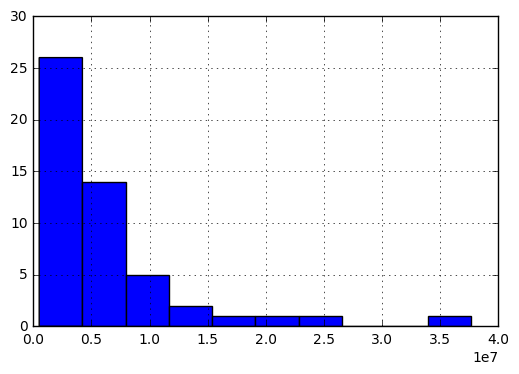

In [218]:
df.population.hist()

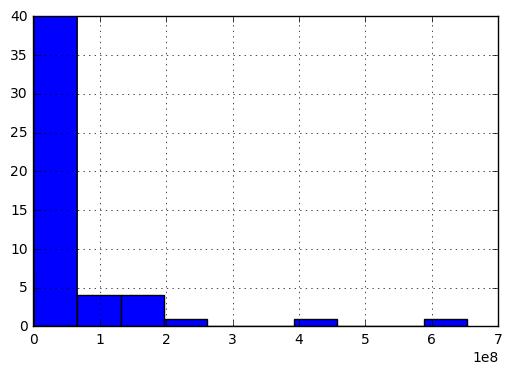

In [223]:
df.arts_grants_2014.hist()
df.arts_grants_2014.apply(np.log10).hist()

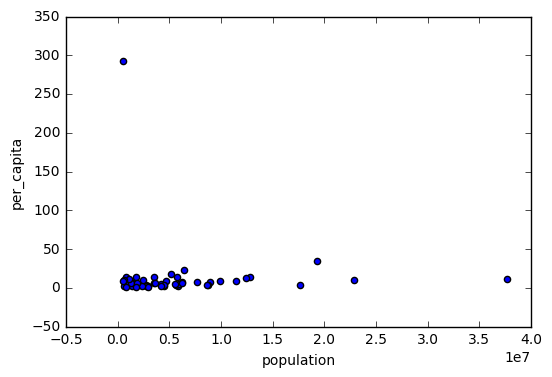

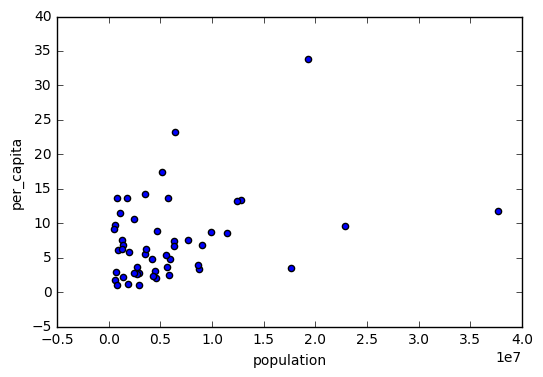

In [217]:
df.plot(kind="scatter", x="population", y="per_capita")
df_no_dc = df.drop(["District of Columbia"])
df_no_dc.plot(kind="scatter", x="population", y="per_capita")

In [207]:
df.corr()

                  population  arts_grants_2014  per_capita  population_pct  \
population          1.000000          0.765538   -0.060489        1.000000   
arts_grants_2014    0.765538          1.000000    0.232738        0.765538   
per_capita         -0.060489          0.232738    1.000000       -0.060489   
population_pct      1.000000          0.765538   -0.060489        1.000000   
funding_pct         0.765538          1.000000    0.232738        0.765538   

                  funding_pct  
population           0.765538  
arts_grants_2014     1.000000  
per_capita           0.232738  
population_pct       0.765538  
funding_pct          1.000000  

## Writing Data to Files

As well as being able to read several data input formats, Pandas can also export data to a variety of storage formats. We will bring your attention to just a couple of these.

In [208]:
df.to_csv("arts_grants_extended.txt", delimiter="\t")

The `to_csv` method writes a `DataFrame` to a comma-separated values (csv) file. You can specify custom delimiters (via `sep` argument), how missing values are written (via `na_rep` argument), whether the index is writen (via `index` argument), whether the header is included (via `header` argument), among other options.

An efficient way of storing data to disk is in binary format. Pandas supports this using Python’s built-in pickle serialization.

In [224]:
df.to_pickle("arts_funding.pkl")

The complement to `to_pickle` is the `read_pickle` function, which restores the pickle to a `DataFrame` or `Series`:

In [225]:
pd.read_pickle("arts_funding.pkl").head()

              population  arts_grants_2014  per_capita  population_pct  \
display_name                                                             
Alabama          4530315           9204877    2.031840        1.523552   
Alaska            660633           1953665    2.957262        0.222172   
Arizona          5863809          14529546    2.477834        1.972008   
Arkansas         2757631           9850864    3.572220        0.927395   
California      37691912         442319185   11.735122       12.675846   

              funding_pct  
display_name               
Alabama          0.297310  
Alaska           0.063102  
Arizona          0.469293  
Arkansas         0.318175  
California      14.286556  

As Wes warns in his book, it is recommended that binary storage of data via pickle only be used as a temporary storage format, in situations where speed is relevant. This is because there is no guarantee that the pickle format will not change with future versions of Python.

For example, we might be interested in the distribution of transit lengths, so we can plot them as a histogram:

Though most of the transits appear to be short, there are a few longer distances that make the plot difficult to read. This is where a transformation is useful:

Pandas has many additional capabilities - SQL-like joins; merging dataframes; groupby; concatenating multiple frames; pivoting rows and columns.

## Data aggregation and GroupBy operations

One of the most powerful features of Pandas is its **GroupBy** functionality. On occasion we may want to perform operations on *groups* of observations within a dataset. For exmaple:

* **aggregation**, such as computing the sum of mean of each group, which involves applying a function to each group and returning the aggregated results
* **slicing** the DataFrame into groups and then doing something with the resulting slices (*e.g.* plotting)
* group-wise **transformation**, such as standardization/normalization

In [240]:
data = np.load("zips_and_revenues.npy")
data = data.T
dfz = pd.DataFrame(data,index=data[:,0], columns=["zip_code", "revenue"])
dfz.head()

       zip_code  revenue
19904     19904   430457
98248     98248    31454
37402     37402  2830870
22906     22906   447016
62420     62420    49731

In [241]:
revenue_grouped = dfz.groupby("zip_code")

This *grouped* dataset is hard to visualize



In [242]:
revenue_grouped

However, the grouping is only an intermediate step; for example, we may want to **iterate** over each of the patient groups:

In [ ]:
for zip_code, group in revenue_grouped:
    print(zip_code)
    print(group)
    print()

613
     zip_code   revenue
613       613  33720237

631
     zip_code  revenue
631       631   634121

637
     zip_code  revenue
637       637     4069

650
     zip_code  revenue
650       650  1245513

662
     zip_code  revenue
662       662  3756746

678
     zip_code   revenue
678       678  10895050

729
     zip_code  revenue
729       729   225465

730
     zip_code  revenue
730       730  1189979

738
     zip_code  revenue
738       738  1502735

739
     zip_code   revenue
739       739  30031077

754
     zip_code  revenue
754       754   119386

766
     zip_code  revenue
766       766    96719

794
     zip_code   revenue
794       794  12674917

801
     zip_code  revenue
801       801    60669

802
     zip_code  revenue
802       802  8738030

805
     zip_code  revenue
805       805  5399895

820
     zip_code  revenue
820       820   213133
820       820   447602

822
     zip_code  revenue
822       822    48587
822       822  1028479

831
     zip_code  revenue
8

A common data analysis procedure is the **split-apply-combine** operation, which groups subsets of data together, applies a function to each of the groups, then recombines them into a new data table.

For example, we may want to aggregate our data with with some function.

![split-apply-combine](http://f.cl.ly/items/0s0Z252j0X0c3k3P1M47/Screen%20Shot%202013-06-02%20at%203.04.04%20PM.png)

<div align="right">*(figure taken from "Python for Data Analysis", p.251)*</div>

We can aggregate in Pandas using the `aggregate` (or `agg`, for short) method:

In [91]:
cdystonia_grouped.agg(np.mean).head()

         patient  obs  week  site  id  age     twstrs  treatment
patient                                                         
1              1  3.5   7.0     1   1   65  33.000000          1
2              2  3.5   7.0     1   2   70  47.666667          2
3              3  3.5   7.0     1   3   64  30.500000          1
4              4  2.5   3.5     1   4   59  60.000000          0
5              5  3.5   7.0     1   5   76  46.166667          2

Notice that the `treat` and `sex` variables are not included in the aggregation. Since it does not make sense to aggregate non-string variables, these columns are simply ignored by the method.

Some aggregation functions are so common that Pandas has a convenience method for them, such as `mean`:

In [92]:
cdystonia_grouped.mean().head()

         patient  obs  week  site  id  age     twstrs  treatment
patient                                                         
1              1  3.5   7.0     1   1   65  33.000000          1
2              2  3.5   7.0     1   2   70  47.666667          2
3              3  3.5   7.0     1   3   64  30.500000          1
4              4  2.5   3.5     1   4   59  60.000000          0
5              5  3.5   7.0     1   5   76  46.166667          2

The `add_prefix` and `add_suffix` methods can be used to give the columns of the resulting table labels that reflect the transformation:

In [93]:
cdystonia_grouped.mean().add_suffix('_mean').head()

         patient_mean  obs_mean  week_mean  site_mean  id_mean  age_mean  \
patient                                                                    
1                   1       3.5        7.0          1        1        65   
2                   2       3.5        7.0          1        2        70   
3                   3       3.5        7.0          1        3        64   
4                   4       2.5        3.5          1        4        59   
5                   5       3.5        7.0          1        5        76   

         twstrs_mean  treatment_mean  
patient                               
1          33.000000               1  
2          47.666667               2  
3          30.500000               1  
4          60.000000               0  
5          46.166667               2  

In [94]:
# The median of the `twstrs` variable
cdystonia_grouped['twstrs'].quantile(0.5)

patient
1          34.0
2          50.5
3          30.5
4          61.5
5          48.5
6          48.0
7          42.0
8          32.5
9          35.5
10         20.5
...
99         29.0
100        61.0
101        32.5
102        51.5
103        45.0
104        46.0
105        45.5
106        67.5
107        44.0
108        50.5
109        38.0
Name: twstrs, Length: 109, dtype: float64

If we wish, we can easily aggregate according to multiple keys:

In [95]:
cdystonia.groupby(['week','site']).mean().head()

           patient  obs   id        age     twstrs  treatment
week site                                                    
0    1         6.5    1  6.5  59.000000  43.083333   1.000000
     2        19.5    1  7.5  53.928571  51.857143   0.928571
     3        32.5    1  6.5  51.500000  38.750000   1.000000
     4        42.5    1  4.5  59.250000  48.125000   1.000000
     5        49.5    1  3.5  51.833333  49.333333   1.000000

Alternately, we can **transform** the data, using a function of our choice with the `transform` method:

In [96]:
normalize = lambda x: (x - x.mean())/x.std()

cdystonia_grouped.transform(normalize).head()

   patient       obs      week  site  id  age    twstrs  treatment
0      NaN -1.336306 -1.135550   NaN NaN  NaN -0.181369        NaN
1      NaN -0.801784 -0.811107   NaN NaN  NaN -0.544107        NaN
2      NaN -0.267261 -0.486664   NaN NaN  NaN -1.632322        NaN
3      NaN  0.267261  0.162221   NaN NaN  NaN  0.725476        NaN
4      NaN  0.801784  0.811107   NaN NaN  NaN  1.088214        NaN

It is easy to do column selection within `groupby` operations, if we are only interested split-apply-combine operations on a subset of columns:

In [97]:
cdystonia_grouped['twstrs'].mean().head()

patient
1          33.000000
2          47.666667
3          30.500000
4          60.000000
5          46.166667
Name: twstrs, dtype: float64

In [98]:
# This gives the same result as a DataFrame
cdystonia_grouped[['twstrs']].mean().head()

            twstrs
patient           
1        33.000000
2        47.666667
3        30.500000
4        60.000000
5        46.166667

If you simply want to divide your DataFrame into chunks for later use, its easy to convert them into a dict so that they can be easily indexed out as needed:

In [99]:
chunks = dict(list(cdystonia_grouped))

In [100]:
chunks[4]

    patient  obs  week  site  id    treat  age sex  twstrs  treatment
18        4    1     0     1   4  Placebo   59   F      53          0
19        4    2     2     1   4  Placebo   59   F      61          0
20        4    3     4     1   4  Placebo   59   F      64          0
21        4    4     8     1   4  Placebo   59   F      62          0

By default, `groupby` groups by row, but we can specify the `axis` argument to change this. For example, we can group our columns by type this way:

In [101]:
dict(list(cdystonia.groupby(cdystonia.dtypes, axis=1)))

{dtype('int64'):      patient  obs  week  site  id  age  twstrs  treatment
 0          1    1     0     1   1   65      32          1
 1          1    2     2     1   1   65      30          1
 2          1    3     4     1   1   65      24          1
 3          1    4     8     1   1   65      37          1
 4          1    5    12     1   1   65      39          1
 5          1    6    16     1   1   65      36          1
 6          2    1     0     1   2   70      60          2
 7          2    2     2     1   2   70      26          2
 8          2    3     4     1   2   70      27          2
 9          2    4     8     1   2   70      41          2
 10         2    5    12     1   2   70      65          2
 11         2    6    16     1   2   70      67          2
 ..       ...  ...   ...   ...  ..  ...     ...        ...
 619      107    6    16     9   9   50      52          2
 620      108    1     0     9  10   39      63          2
 621      108    2     2     9  10   39 

Its also possible to group by one or more levels of a hierarchical index. Recall `cdystonia2`, which we created with a hierarchical index:

In [102]:
cdystonia2.head(10)

             week  site  id   treat  age sex  twstrs
patient obs                                         
1       1       0     1   1   5000U   65   F      32
        2       2     1   1   5000U   65   F      30
        3       4     1   1   5000U   65   F      24
        4       8     1   1   5000U   65   F      37
        5      12     1   1   5000U   65   F      39
        6      16     1   1   5000U   65   F      36
2       1       0     1   2  10000U   70   F      60
        2       2     1   2  10000U   70   F      26
        3       4     1   2  10000U   70   F      27
        4       8     1   2  10000U   70   F      41

In [103]:
cdystonia2.groupby(level='obs', axis=0)['twstrs'].mean()

obs
1      45.651376
2      37.611650
3      37.066038
4      39.807692
5      42.913462
6      45.628571
Name: twstrs, dtype: float64